# MNIST Using CNN

https://github.com/bat67/pytorch-tutorials-examples-and-books/blob/master/7.Convolutional_Neural_Network(CNN)%20%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/MNIST-using-CNN.py

In [1]:
import torch 
import torch.utils.data 
import torch.nn
import torchvision.datasets
import torchvision.transforms

In [3]:
import os 
os.listdir()
path = 'C:\\Users\\swang8\\Desktop\\Academia\\CV\\Code\\CV_Related_Tutorial\\data'

In [4]:
# data load 

train_dataset = torchvision.datasets.MNIST(root=path,
                                           train=True, transform= torchvision.transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root=path,
                                          train=False, transform=torchvision.transforms.ToTensor(),
                                          download=True)

batch_size = 512 
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size = batch_size
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size= batch_size
)


100%|██████████| 9912422/9912422 [00:01<00:00, 7394296.49it/s] 


Extracting C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]

Extracting C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2840900.66it/s]


Extracting C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\swang8\Desktop\Academia\CV\Code\CV_Related_Tutorial\data\MNIST\raw


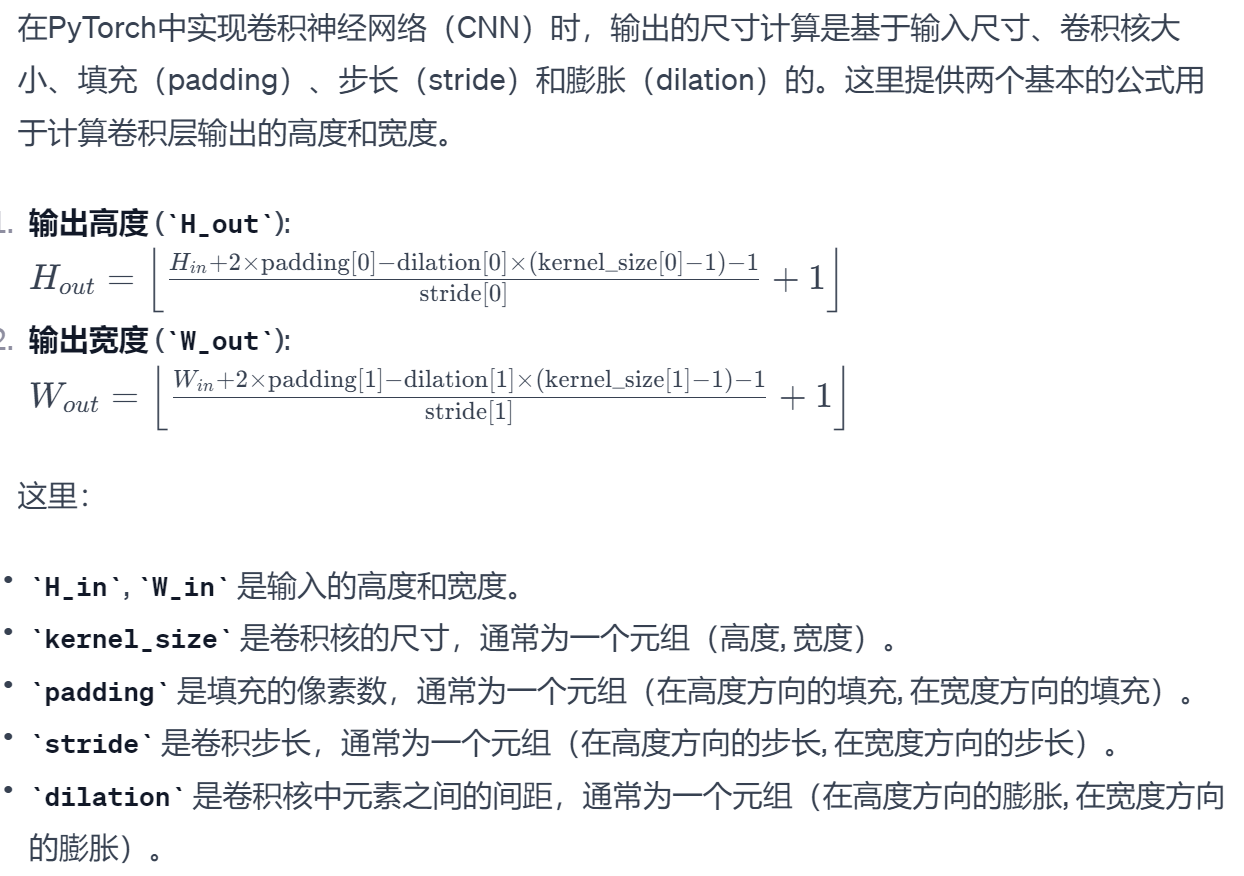

In [7]:
fig_path = 'C:\\Users\\swang8\\Desktop\\Academia\\CV\\Code\\CV_Related_Tutorial\\fig\\cnn_1.png'

from PIL import Image
from IPython.display import display

img = Image.open(fig_path)
display(img)


In [12]:
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=3, padding=1),   # [28 +2*1 -(3-1)-1]/1 + 1 = 28
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1), #[28+2*1-3]/1+1  = 28
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(stride=2, kernel_size=2)  # 14*14 
        )
        
        self.dense = torch.nn.Sequential(
            torch.nn.Linear(128*14*14, 1024),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(1024, 10)
        )
        
    def forward(self,x):
            x =self.conv1(x)
            x = x.view(-1, 128*14*14)
            x = self.dense(x)
            return x 
        
        
net = Net()

In [15]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

num_epochs = 5

for epoch in range(num_epochs):
    for idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        
        preds = net(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        
        if idx % 100 ==0:
            print('epoch {}, batch {}, loss = {:g}'.format(
                    epoch, idx, loss.item()))
            

epoch 0, batch 0, loss = 2.29989
epoch 0, batch 100, loss = 0.0811618
epoch 1, batch 0, loss = 0.0955304
epoch 1, batch 100, loss = 0.0368171
epoch 2, batch 0, loss = 0.075176
epoch 2, batch 100, loss = 0.0390464
epoch 3, batch 0, loss = 0.044546
epoch 3, batch 100, loss = 0.0369027
epoch 4, batch 0, loss = 0.0299622
epoch 4, batch 100, loss = 0.0349952


In [18]:
correct = 0 
total = 0 

for images, labels in test_loader:
    preds = net(images)
    predicted = torch.argmax(preds,1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()
    
accuracy = correct / total
print('test acc: {:.1%}'.format(accuracy)) 

test acc: 98.6%
